Preview of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object

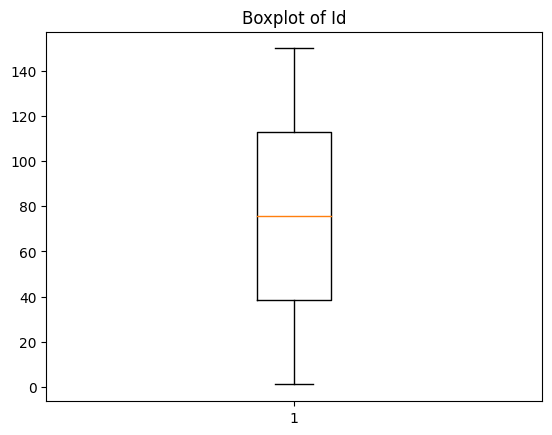

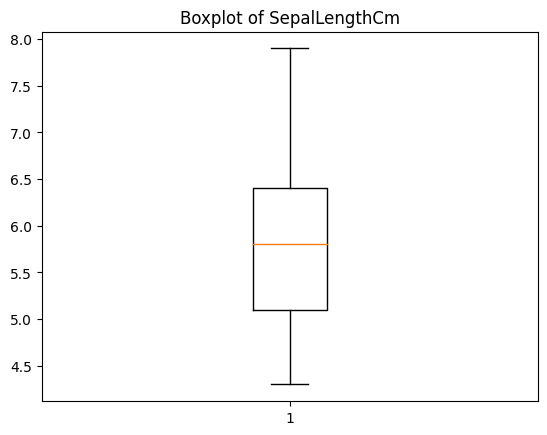

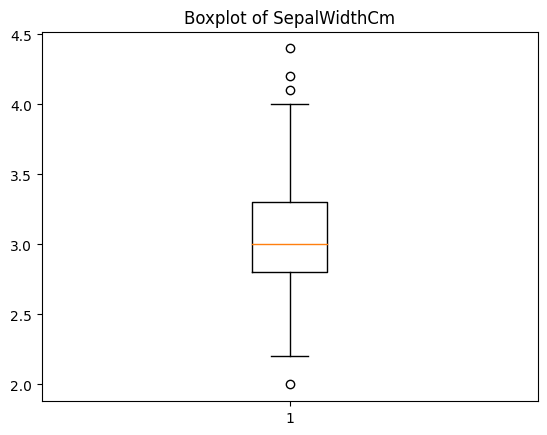

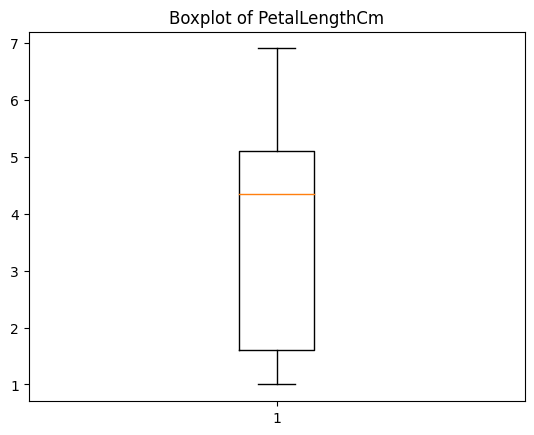

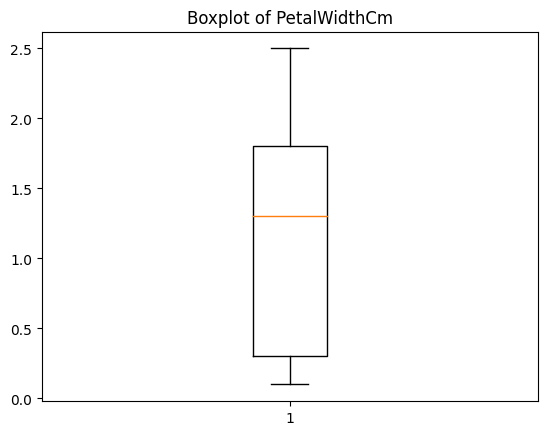

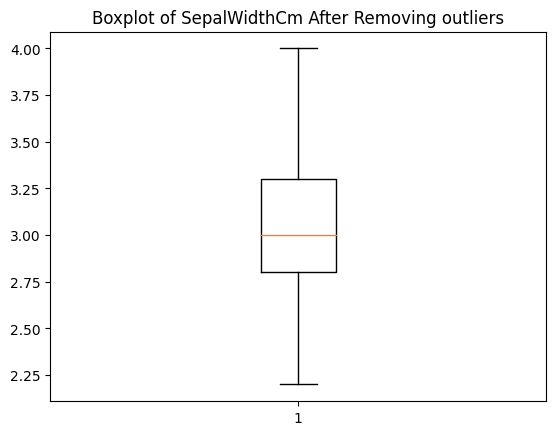


Histograms:


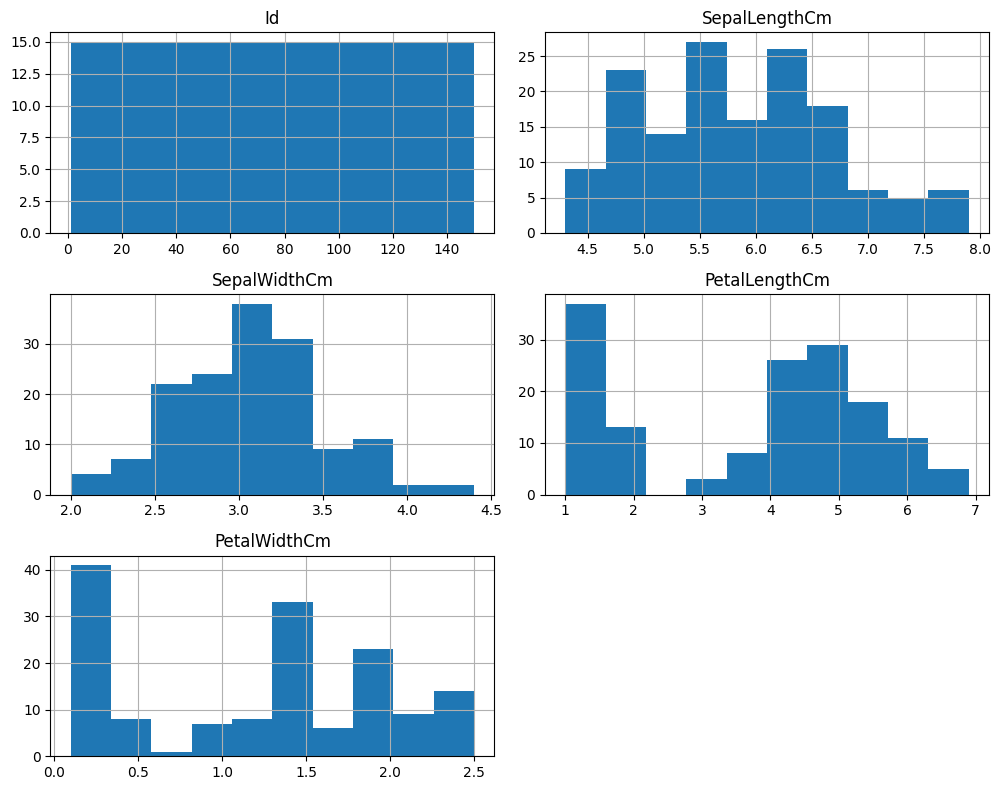

SVM Model Metrics:
Accuracy: 0.972972972972973
Precision: 0.9759759759759761
Recall: 0.972972972972973
F1 Score: 0.9732273449920509
ROC AUC: 1.0

Random Forest Model Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0

Value counts for Species:
Species
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: count, dtype: int64


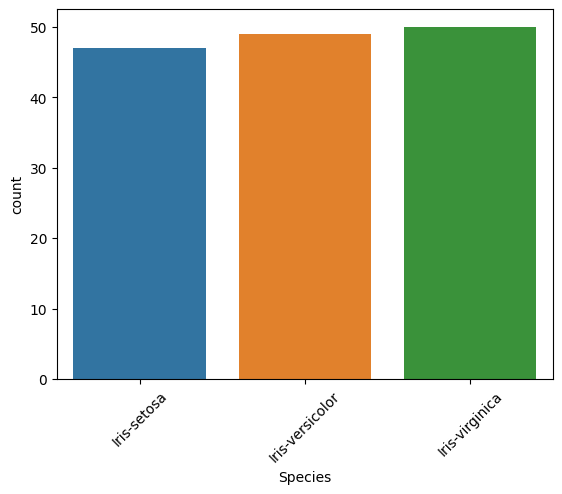


Correlation Heatmap:


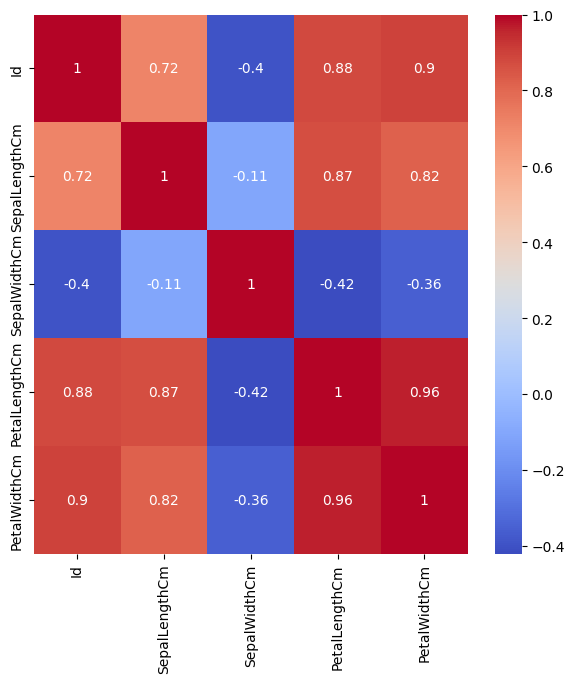

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics

def perform_eda(filepath):
    # Load the dataset into a pandas DataFrame
    try:
        df = pd.read_csv(filepath,encoding='iso-8859-1')
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return

    # Display the first few rows of the dataset
    print("Preview of the dataset:")
    print(df.head())

    # Get basic information about the dataset
    print("\nDataset Information:")
    print(df.info())

    # Filter only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    print(numeric_df.head())
    # Summary statistics of numerical columns
    print("\nSummary Statistics:")
    print(df.describe())

    # Identify missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    # Handle missing values
    if df.isnull().values.any():
        imputer = SimpleImputer(strategy='mean')
        df = imputer.fit_transform(df)
    
    # Identify outliers
    # Create a boxplot for each column
    for column in numeric_df:
        plt.boxplot(numeric_df[column])
        plt.title('Boxplot of '+column)
        # Display the boxplots
        plt.show()
    # Handle outliers
    
    # Calculate the interquartile range
    q1 = df['SepalWidthCm'].quantile(0.25)
    q3 = df['SepalWidthCm'].quantile(0.75)
    iqr = q3 - q1
    # Identify the outliers
    outliers = df['SepalWidthCm'].loc[(df['SepalWidthCm'] < q1 - 1.5 * iqr) | (df['SepalWidthCm'] > q3 + 1.5 * iqr)]
    # Remove the outliers
    df = df.loc[~df['SepalWidthCm'].isin(outliers)]

       # Creating boxplot to check if outliers still exist for the column
    plt.boxplot(df['SepalWidthCm'])
    plt.title('Boxplot of SepalWidthCm After Removing outliers')
    # Display the boxplots
    plt.show()
    

    # Visualize the distribution of numerical features using histograms
    print("\nHistograms:")
    numeric_df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Species', axis=1), df['Species'], test_size=0.25)

    # Create and optimize the Support Vector Machine (SVM) model
    svm_model = SVC(random_state=42, probability=True)

    # Feature selection using Recursive Feature Elimination (RFE) for Random Forest
    random_forest_model = RandomForestClassifier(random_state=42)
    rfe = RFE(random_forest_model, n_features_to_select=2)  # Select the top 2 features
    rfe.fit(X_train, y_train)

    # Get the selected features from RFE
    selected_features = X_train.columns[rfe.support_]

    # Train the Random Forest model with selected features
    random_forest_model.fit(X_train[selected_features], y_train)

    # Evaluate the SVM model
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = metrics.accuracy_score(y_test, svm_predictions)
    svm_precision = metrics.precision_score(y_test, svm_predictions, average='weighted')
    svm_recall = metrics.recall_score(y_test, svm_predictions, average='weighted')
    svm_f1_score = metrics.f1_score(y_test, svm_predictions, average='weighted')
    svm_roc_auc = metrics.roc_auc_score(pd.get_dummies(y_test), svm_model.predict_proba(X_test), multi_class='ovr', average='weighted')

    # Evaluate the Random Forest model
    random_forest_predictions = random_forest_model.predict(X_test[selected_features])
    random_forest_accuracy = metrics.accuracy_score(y_test, random_forest_predictions)
    random_forest_precision = metrics.precision_score(y_test, random_forest_predictions, average='weighted')
    random_forest_recall = metrics.recall_score(y_test, random_forest_predictions, average='weighted')
    random_forest_f1_score = metrics.f1_score(y_test, random_forest_predictions, average='weighted')
    random_forest_roc_auc = metrics.roc_auc_score(pd.get_dummies(y_test), random_forest_model.predict_proba(X_test[selected_features]), multi_class='ovr', average='weighted')

    # Print the evaluation metrics for both models
    print("SVM Model Metrics:")
    print("Accuracy:", svm_accuracy)
    print("Precision:", svm_precision)
    print("Recall:", svm_recall)
    print("F1 Score:", svm_f1_score)
    print("ROC AUC:", svm_roc_auc)

    print("\nRandom Forest Model Metrics:")
    print("Accuracy:", random_forest_accuracy)
    print("Precision:", random_forest_precision)
    print("Recall:", random_forest_recall)
    print("F1 Score:", random_forest_f1_score)
    print("ROC AUC:", random_forest_roc_auc)


    # Visualize categorical features
    categorical_features = df.select_dtypes(include=["object"]).columns
    for feature in categorical_features:
        print(f"\nValue counts for {feature}:")
        print(df[feature].value_counts())
        sns.countplot(x=feature, data=df)
        plt.xticks(rotation=45)
        plt.show()

    #Visualize the correlation between numerical features using a heatmap
    print("\nCorrelation Heatmap:")
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(7, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

if __name__ == "__main__":
    # Replace  with the actual file name and path
    file_path = r'D:\Python_Programming_for_BigData\Lab 10\Iris.csv'
    perform_eda(file_path)